## 텍스트 기반의 다중 분류

환경로드

In [1]:
from sklearn.datasets import fetch_20newsgroups # 데이터로드
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer # 토큰
from tensorflow.keras.utils import to_categorical # 원핫인코딩 (정수형 범주를 입력해야한다.)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

data로드

In [2]:
data = fetch_20newsgroups()
X_data = data.data
Y_data = data.target

data전처리

In [4]:
tk = Tokenizer(num_words=10000)
tk.fit_on_texts(X_data)
X=tk.texts_to_matrix(X_data,mode='tfidf') # mode = [binary, count, tfidf]
Y=to_categorical(Y_data)
t_x,tt_x,t_y,tt_y=train_test_split(X,Y)

모델 생성 및 학습

In [5]:
m = Sequential()
m.add(Dense(256,input_shape=(10000,),activation='relu'))
m.add(Dropout(0.5))
m.add(Dense(128,activation='relu'))
m.add(Dropout(0.5))
m.add(Dense(20,activation='softmax'))
m.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hy = m.fit(t_x,t_y,epochs=10,validation_data=(tt_x,tt_y))

Epoch 1/10
266/266 [==============================] - 5s 14ms/step - loss: 1.9516 - accuracy: 0.4469 - val_loss: 0.6172 - val_accuracy: 0.8586
Epoch 2/10
266/266 [==============================] - 3s 13ms/step - loss: 0.7615 - accuracy: 0.8075 - val_loss: 0.4445 - val_accuracy: 0.8904
Epoch 3/10
266/266 [==============================] - 3s 13ms/step - loss: 0.5588 - accuracy: 0.8899 - val_loss: 0.4184 - val_accuracy: 0.8894
Epoch 4/10
266/266 [==============================] - 3s 13ms/step - loss: 0.3381 - accuracy: 0.9305 - val_loss: 0.4183 - val_accuracy: 0.8982
Epoch 5/10
266/266 [==============================] - 3s 13ms/step - loss: 0.2550 - accuracy: 0.9454 - val_loss: 0.4334 - val_accuracy: 0.9017
Epoch 6/10
266/266 [==============================] - 3s 12ms/step - loss: 0.2231 - accuracy: 0.9610 - val_loss: 0.4232 - val_accuracy: 0.9060
Epoch 7/10
266/266 [==============================] - 3s 12ms/step - loss: 0.2027 - accuracy: 0.9617 - val_loss: 0.4513 - val_accuracy: 0.9003

결과 확인

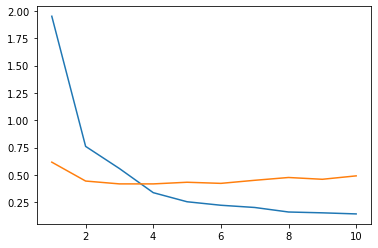

In [6]:
ec = range(1,len(hy.history['accuracy'])+1)
plt.plot(ec,hy.history['loss'])
plt.plot(ec,hy.history['val_loss'])